# Práctica 2

Miembros del equipo:
- Jorge Casan Vázquez
- Luis Llera 
- Álvaro Ferro
- Victor Miguel Sempere
- Ricardo Ocaña
- Álvaro Rodriguez

Nos cargamos las librerías necesarias, al igual que en la práctica 1, para poder realizar esta práctica

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read data

In [49]:
df = pd.read_csv('prosperLoanData_train.csv')
df_oot = pd.read_csv('prosperLoanData_oot.csv')

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [50]:
df.groupby('bad').size()

bad
False    15927
True      1060
dtype: int64

In [51]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

## Differenciate between usable features and other columns

## TO DO

En esta sección tendremos que eliminar aquellas columnas que no vayamos a usar. Para ello tendremos que detallar todas aquellas columnas que vayamos a eliminar con las explicaciones pertinentes. En consecuencia, todas aquellas variables que no vayamos a utilizar no estarán incluidas como **FEATURES**

Variables a excluir:
- **LoanStatus**: Al no tener en cuenta la maturity no se tendrá en consideración 
- **ClosedDate**: Porque tiene información pasada de la *Origination Date*
- **BorrowerAPR**: Es el ratio de porcentaje que no nos aporta información sobre la maturity. Después de la fecha de originación
- **ListingKey**: Es un ID
- **ListingNumber**: Es un ID
- **ListingCreationDate**: Es una fecha
- **Term**: Es la longuitud del préstamo
- **CreditGrade**: Solo tiene información hasta 2009.
- **BorrowerRate**: Después de la fecha de originación
- **LenderYield**: Son los datos del lender (prestamista)
- **EstimatedEffectiveYield**: Contiene datos de otras variables. Multicolinealidad.
- **EstimatedLoss**: Información a partir de Julio 2009
- **EstimatedReturn**: Información a partir de Julio 2009
- **BorrowerState**: Información localidad
- **CurrentlyInGroup**: Te establece un grupo específico.
- **GroupKey**: ID
- **DateCreditPulled**:Fecha 
- **PublicRecordsLast10Years**: Contiene información fuera del rango
- **PublicRecordsLast12Months**: Contiene información fuera del rango
- **RevolvingCreditBalance**: Contiene información fuera del rango
- **BankcardUtilization**: Porcentaje fuera del rango
- **AvailableBankcardCredit**:Porcentaje fuera del rango
- **TradesOpenedLast6Months**: Información solo de los últimos 6 meses de la variable
- **DebtToIncomeRatio**: Fecha cuando fue originado el préstamo
- **IncomeVerifiable**: String
- **LoanKey**: ID
- **TotalProsperLoans**: Modelo de Prosper
- **TotalProsperPaymentsBilled**: Modelo de Prosper
- **OnTimeProsperPayments**: Modelo de Prosper
- **ProsperPaymentsLessThanOneMonthLate**: Modelo de Prosper
- **ProsperPaymentsOneMonthPlusLate**: Modelo de Prosper
- **ProsperPrincipalBorrowed**: Modelo de Prosper
- **ProsperPrincipalOutstanding**: Modelo de Prosper
- **LoanCurrentDaysDelinquent**: Después de la fecha de originación
- **LoanFirstDefaultedCycleNumber**: Variable objetivo 
- **LoanMonthsSinceOrigination**: Después de la fecha de originación
- **LoanNumber**: ID
- **LP_CustomerPrincipalPayments**:El préstamo está charge-off
- **LoanOriginationDate**: Fecha
- **LoanOriginationQuarter**: Fecha
- **LP_CustomerPrincipalPayments**: Información despúes fecha originación
- **LP_CustomerPayments**: Información despúes fecha originación
- **MonthlyLoanPayment**: Fecha
- **MemberKey**: ID
- **LP_InterestandFees**Intereses
- **LP_ServiceFees**: Comisiones
- **LP_CollectionFees**: Comisiones
- **LP_GrossPrincipalLoss**:  Información despúes fecha originación
- **LP_NetPrincipalLoss**: Información despúes fecha originación
- **LP_NonPrincipalRecoverypayments**:Información despúes fecha originación
- **Recommendations**: String
- **InvestmentFromFriendsCount**:Información despúes fecha originación
- **Investors**_ ID
- **InvestmentFromFriendsAmount**: Información despúes fecha originación
- **bad_aux**: Variable creada
- **PW**:La Performance Window la quitamos de nuestro modelo. Variable creada
- **bad_rate**: El porcentaje de préstamos malos decidimos quitarla porque forma parte del Target.Variable creada
- **bad**: Es la columna objetivo por lo que decidimos quitarla de nuestro modelo.Variable creada
- **fraud**: Variable creada
- **indeterm**: No aporta información para evaluar el estado actual del préstamo.Variable creada
- **LoanOriginationYear**: Fecha
- **LoanMonthsSinceOriginationY**: Fecha

In [52]:
drop = ["LoanStatus","ClosedDate","BorrowerAPR","ListingKey","ListingNumber","ListingCreationDate","Term",
             "CreditGrade","BorrowerRate","LenderYield","EstimatedEffectiveYield","EstimatedLoss",
             "EstimatedReturn","BorrowerState","CurrentlyInGroup",
             "GroupKey","DateCreditPulled","PublicRecordsLast10Years",
             "PublicRecordsLast12Months","RevolvingCreditBalance","BankcardUtilization","AvailableBankcardCredit",
             "TradesOpenedLast6Months","DebtToIncomeRatio","IncomeVerifiable","LoanKey",'TotalProsperLoans',
             'TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate',
             'ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','LoanCurrentDaysDelinquent','LoanFirstDefaultedCycleNumber','LoanMonthsSinceOrigination',
             'LoanNumber',"LP_CustomerPrincipalPayments",'LoanOriginationDate','LoanOriginationQuarter',
             'LP_CustomerPrincipalPayments','LP_CustomerPayments','MonthlyLoanPayment','MemberKey',
             "LP_InterestandFees","LP_ServiceFees","LP_CollectionFees","LP_GrossPrincipalLoss",
             "LP_NetPrincipalLoss","LP_NonPrincipalRecoverypayments","Recommendations", "InvestmentFromFriendsCount","Investors",
             "InvestmentFromFriendsAmount", "bad_aux", "PW", "bad_rate", "bad", 'fraud', 'indeterm', 'LoanOriginationYear', 'LoanMonthsSinceOriginationY',
            'ProsperRating (numeric)', 
            'ProsperRating (Alpha)', 'ProsperScore', 'FirstRecordedCreditLine'] #####]

In [53]:
features = [c for c in df.columns if c not in drop]
col_target = 'bad'

In [54]:
features

['ListingCategory (numeric)',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'IncomeRange',
 'StatedMonthlyIncome',
 'ScorexChangeAtTimeOfListing',
 'LoanOriginalAmount',
 'PercentFunded',
 'LoanFirstDefaultedCycleNumberQ']

## Data exploration

El primer enfoque que le daremos a nuestras variables será el conocer el tipo de variables que son.
- Por una parte, observamos que muchas variables son de tipo *float64*, las cuales serán como **variables numéricas**
- Por otra parte, observamos que otras variables son de tipo *object* o incluso *booleanos*, las cuales serán **variables categóricas**

In [55]:
df[features].dtypes

ListingCategory (numeric)               int64
Occupation                             object
EmploymentStatus                       object
EmploymentStatusDuration              float64
IsBorrowerHomeowner                      bool
CreditScoreRangeLower                 float64
CreditScoreRangeUpper                 float64
CurrentCreditLines                    float64
OpenCreditLines                       float64
TotalCreditLinespast7years            float64
OpenRevolvingAccounts                   int64
OpenRevolvingMonthlyPayment           float64
InquiriesLast6Months                  float64
TotalInquiries                        float64
CurrentDelinquencies                  float64
AmountDelinquent                      float64
DelinquenciesLast7Years               float64
TotalTrades                           float64
TradesNeverDelinquent (percentage)    float64
IncomeRange                            object
StatedMonthlyIncome                   float64
ScorexChangeAtTimeOfListing       

Establecemos una disgregación de variables, para ello separemos aquellas variables que sean categóricas de las que sean numéricas y sobre ellas realizaremos un análisis estadístico descriptivo para ir comparándo unas con las otras e intrepetar los resultados estadísticamente más significativos

In [56]:
cat_features = [f for f, b in zip(features, df[features].dtypes == object) if b==True]
num_features = [f for f in features if f not in cat_features]

In [57]:
df[num_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ListingCategory (numeric),16987.0,3.840290,4.103710,0.0,1.00,2.000000,7.000000,20.000000
EmploymentStatusDuration,16982.0,90.379225,89.131565,0.0,27.00,61.000000,126.000000,755.000000
CreditScoreRangeLower,16987.0,701.827280,53.510729,600.0,660.00,700.000000,740.000000,880.000000
CreditScoreRangeUpper,16987.0,720.827280,53.510729,619.0,679.00,719.000000,759.000000,899.000000
CurrentCreditLines,16987.0,9.443398,5.285003,0.0,6.00,9.000000,12.000000,40.000000
OpenCreditLines,16987.0,8.326485,4.740277,0.0,5.00,8.000000,11.000000,34.000000
TotalCreditLinespast7years,16987.0,26.197857,13.843854,2.0,16.00,24.000000,34.000000,120.000000
OpenRevolvingAccounts,16987.0,6.372402,4.224160,0.0,3.00,5.000000,8.000000,33.000000
OpenRevolvingMonthlyPayment,16987.0,355.054630,411.553102,0.0,92.00,225.000000,465.000000,5184.000000
InquiriesLast6Months,16987.0,1.121740,1.611185,0.0,0.00,1.000000,2.000000,27.000000


In [58]:
df[cat_features].describe().transpose()

,count,unique,top,freq
Occupation,16987,67,Other,4460
EmploymentStatus,16987,7,Employed,10647
IncomeRange,16987,7,"$25,000-49,999",5420


### Custom Pandas describing

## TO DO

En este TO DO tendremos que crearnos una *def* que devuelva un análisis descriptivo sobre cada una de las variables numéricas, siguiendo las instrucciones contenidas en la siguiente sección

In [59]:
def desc_num(df, df_oot, col):
    """Function that returns a custom descriptive for the numerical variable. It returns:
        - Mean, median, minimum, maximum, p25, p75, std, %na %nonzero, %unique
        - Histogram plot
        - Stability plot
    
    Args:
        df: Pandas DataFrame with the in time input data
        df_oot: Pandas DataFrame with the out of time input data
        col: Name of the column with the feature under study
        
    Returns:
        Dictionary that contains the main statistics of the feature
    """
    #dictionary to keep main statistics
    dict_stats = {'Mean': df[col].mean(), 
                  'Median':df[col].median(),
                  'Min': df[col].min(),
                  'Max': df[col].max(), 
                  'p25': df[col].quantile(0.25),
                  'p75': df[col].quantile(0.75), 
                  'Std': df[col].std(),
                  'NA %': (df[col].isna().sum() / len(df[col])) * 100,
                  'Non Zero %': df[col].fillna(0).astype(bool).sum() / len(df[col])
                 }
 
    sns.distplot(df[col], hist=False, rug=True, label='DF')
    sns.distplot(df_oot[col], hist=False, rug=True, label='DF OOT')
    plt.legend()
    plt.show()
 
    return dict_stats

Generamos un análisis estadístico descriptivo para las variables numéricas. A través del comando *for* recorreremos cada una de las columnas que sean numéricas para que nos devuelva el output seleccionado a través de la función previamente creada



########-----------------------########
Output for: ListingCategory (numeric)


E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



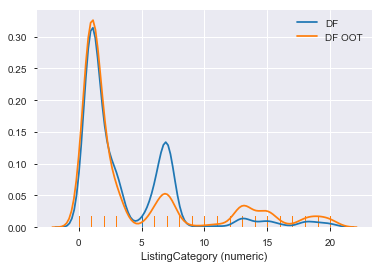

{'Mean': 3.840289633248955, 'Median': 2.0, 'Min': 0, 'Max': 20, 'p25': 1.0, 'p75': 7.0, 'Std': 4.103710458255704, 'NA %': 0.0, 'Non Zero %': 0.9998233943603932}

########-----------------------########
Output for: EmploymentStatusDuration


E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in greater

E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in less



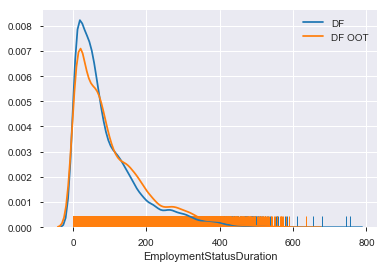

{'Mean': 90.37922506183017, 'Median': 61.0, 'Min': 0.0, 'Max': 755.0, 'p25': 27.0, 'p75': 126.0, 'Std': 89.13156504075539, 'NA %': 0.029434273267793017, 'Non Zero %': 0.9932301171484076}

########-----------------------########
Output for: IsBorrowerHomeowner


E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



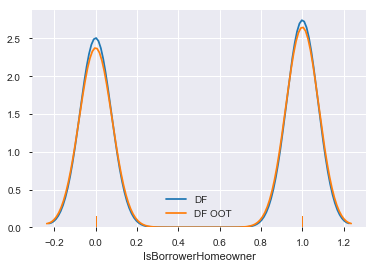

{'Mean': 0.5224583505033261, 'Median': 1.0, 'Min': False, 'Max': True, 'p25': 0.0, 'p75': 1.0, 'Std': 0.4995100707713633, 'NA %': 0.0, 'Non Zero %': 0.5224583505033261}

########-----------------------########
Output for: CreditScoreRangeLower


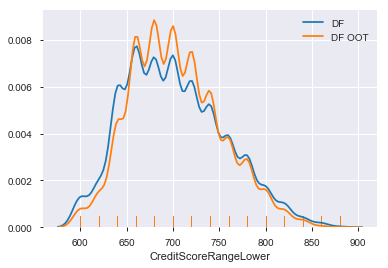

{'Mean': 701.8272796844645, 'Median': 700.0, 'Min': 600.0, 'Max': 880.0, 'p25': 660.0, 'p75': 740.0, 'Std': 53.51072944247077, 'NA %': 0.0, 'Non Zero %': 1.0}

########-----------------------########
Output for: CreditScoreRangeUpper


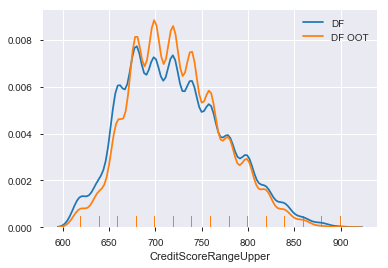

{'Mean': 720.8272796844645, 'Median': 719.0, 'Min': 619.0, 'Max': 899.0, 'p25': 679.0, 'p75': 759.0, 'Std': 53.51072944247077, 'NA %': 0.0, 'Non Zero %': 1.0}

########-----------------------########
Output for: CurrentCreditLines


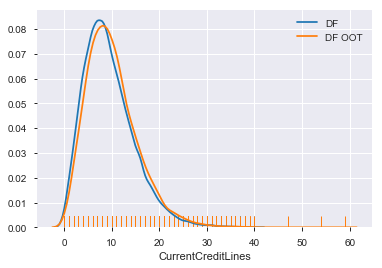

{'Mean': 9.443397892506034, 'Median': 9.0, 'Min': 0.0, 'Max': 40.0, 'p25': 6.0, 'p75': 12.0, 'Std': 5.285003003327637, 'NA %': 0.0, 'Non Zero %': 0.9949961735444752}

########-----------------------########
Output for: OpenCreditLines


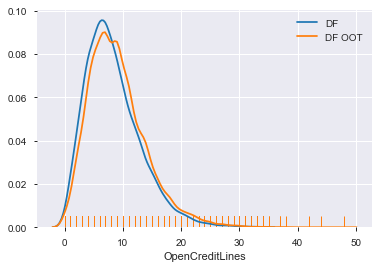

{'Mean': 8.32648495908636, 'Median': 8.0, 'Min': 0.0, 'Max': 34.0, 'p25': 5.0, 'p75': 11.0, 'Std': 4.740277341270298, 'NA %': 0.0, 'Non Zero %': 0.9933478542414788}

########-----------------------########
Output for: TotalCreditLinespast7years


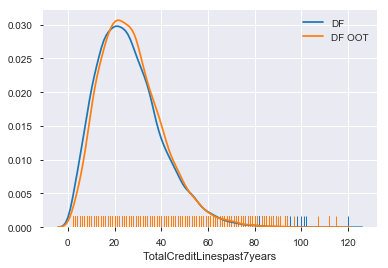

{'Mean': 26.197857184906105, 'Median': 24.0, 'Min': 2.0, 'Max': 120.0, 'p25': 16.0, 'p75': 34.0, 'Std': 13.84385430483548, 'NA %': 0.0, 'Non Zero %': 1.0}

########-----------------------########
Output for: OpenRevolvingAccounts


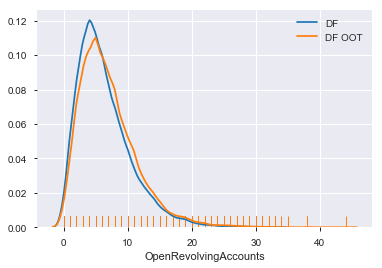

{'Mean': 6.372402425384117, 'Median': 5.0, 'Min': 0, 'Max': 33, 'p25': 3.0, 'p75': 8.0, 'Std': 4.224160143897125, 'NA %': 0.0, 'Non Zero %': 0.9852828633661035}

########-----------------------########
Output for: OpenRevolvingMonthlyPayment


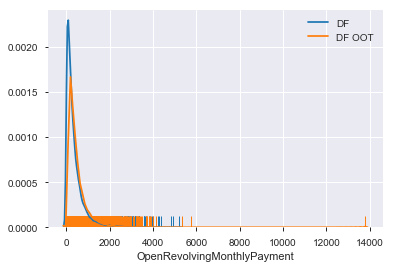

{'Mean': 355.054630011185, 'Median': 225.0, 'Min': 0.0, 'Max': 5184.0, 'p25': 92.0, 'p75': 465.0, 'Std': 411.5531017614722, 'NA %': 0.0, 'Non Zero %': 0.9710955436510272}

########-----------------------########
Output for: InquiriesLast6Months


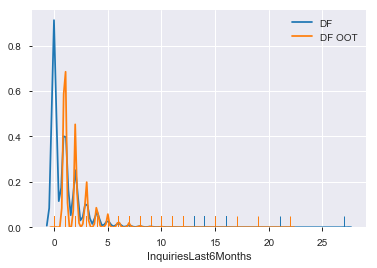

{'Mean': 1.1217401542355918, 'Median': 1.0, 'Min': 0.0, 'Max': 27.0, 'p25': 0.0, 'p75': 2.0, 'Std': 1.6111848799432125, 'NA %': 0.0, 'Non Zero %': 0.5339377170777654}

########-----------------------########
Output for: TotalInquiries


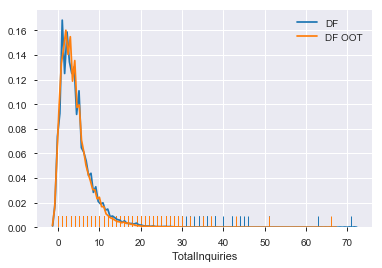

{'Mean': 4.382527815388238, 'Median': 3.0, 'Min': 0.0, 'Max': 71.0, 'p25': 2.0, 'p75': 6.0, 'Std': 4.150006733077492, 'NA %': 0.0, 'Non Zero %': 0.9127568140342615}

########-----------------------########
Output for: CurrentDelinquencies


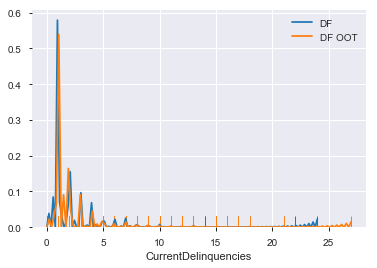

{'Mean': 0.40001177370930713, 'Median': 0.0, 'Min': 0.0, 'Max': 24.0, 'p25': 0.0, 'p75': 0.0, 'Std': 1.2349868466267482, 'NA %': 0.0, 'Non Zero %': 0.18614234414552305}

########-----------------------########
Output for: AmountDelinquent


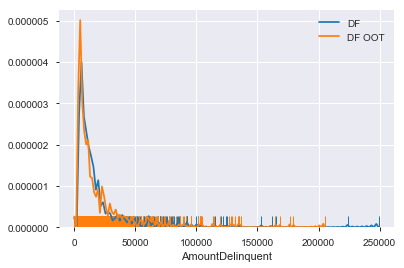

{'Mean': 1030.3483840583976, 'Median': 0.0, 'Min': 0.0, 'Max': 249209.0, 'p25': 0.0, 'p75': 0.0, 'Std': 6715.581776280496, 'NA %': 0.0, 'Non Zero %': 0.1555895684935539}

########-----------------------########
Output for: DelinquenciesLast7Years


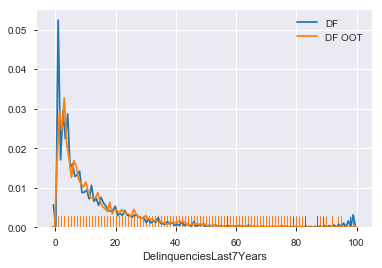

{'Mean': 3.5317595808559488, 'Median': 0.0, 'Min': 0.0, 'Max': 99.0, 'p25': 0.0, 'p75': 2.0, 'Std': 8.866965588828075, 'NA %': 0.0, 'Non Zero %': 0.3035850944840172}

########-----------------------########
Output for: TotalTrades


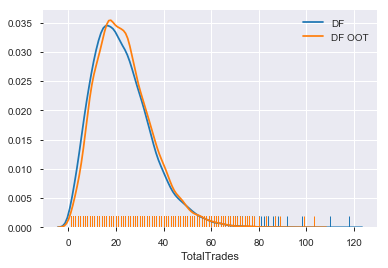

{'Mean': 22.520574557014186, 'Median': 21.0, 'Min': 1.0, 'Max': 118.0, 'p25': 14.0, 'p75': 30.0, 'Std': 12.107445017158946, 'NA %': 0.0, 'Non Zero %': 1.0}

########-----------------------########
Output for: TradesNeverDelinquent (percentage)


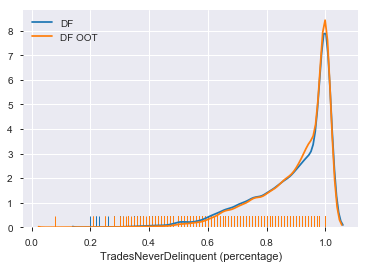

{'Mean': 0.8906257726496544, 'Median': 0.94, 'Min': 0.2, 'Max': 1.0, 'p25': 0.82, 'p75': 1.0, 'Std': 0.13199955043933212, 'NA %': 0.0, 'Non Zero %': 1.0}

########-----------------------########
Output for: StatedMonthlyIncome


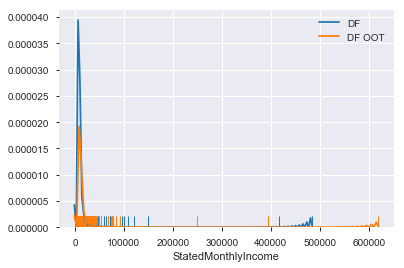

{'Mean': 5516.876572284392, 'Median': 4583.333333, 'Min': 0.0, 'Max': 483333.333333, 'p25': 3100.0, 'p75': 6666.666667, 'Std': 6563.539084030216, 'NA %': 0.0, 'Non Zero %': 0.9854594690057102}

########-----------------------########
Output for: ScorexChangeAtTimeOfListing


E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in greater

E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in less



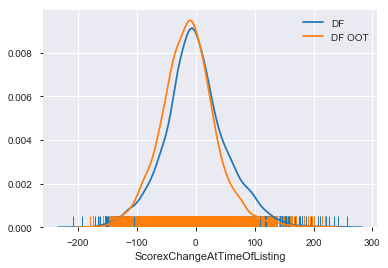

{'Mean': -0.48563636363636364, 'Median': -3.0, 'Min': -209.0, 'Max': 257.0, 'p25': -32.0, 'p75': 29.0, 'Std': 53.22290782119653, 'NA %': 67.62229940542768, 'Non Zero %': 0.3213045269912286}

########-----------------------########
Output for: LoanOriginalAmount


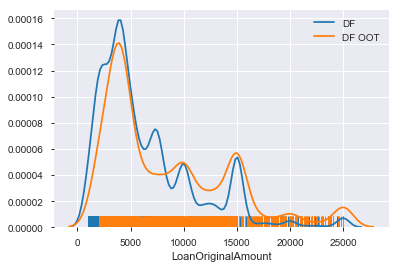

{'Mean': 6411.536998881497, 'Median': 5000.0, 'Min': 1000, 'Max': 25000, 'p25': 3000.0, 'p75': 8000.0, 'Std': 4651.2588964203505, 'NA %': 0.0, 'Non Zero %': 1.0}

########-----------------------########
Output for: PercentFunded


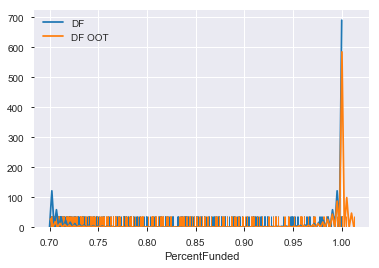

{'Mean': 0.995922888090893, 'Median': 1.0, 'Min': 0.7, 'Max': 1.0, 'p25': 1.0, 'p75': 1.0, 'Std': 0.030350163595966415, 'NA %': 0.0, 'Non Zero %': 1.0}

########-----------------------########
Output for: LoanFirstDefaultedCycleNumberQ


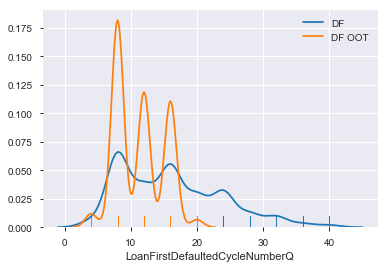

{'Mean': 16.124820659971306, 'Median': 16.0, 'Min': 4.0, 'Max': 40.0, 'p25': 8.0, 'p75': 20.0, 'Std': 7.732998700050832, 'NA %': 83.58744922587861, 'Non Zero %': 0.16412550774121387}


In [60]:
for col in num_features:
    print('\n########-----------------------########')
    print('Output for: {}'.format(col))
    dict_stats = desc_num(df, df_oot, col)
    print(dict_stats)

Realizaremos el mismo análisis para las variables categóricas

In [61]:
from collections import Counter

def desc_cat(df, df_oot, col):
    """Function that returns a custom descriptive for the categorical variable. It returns:
        - # Unique entires, % Unique entries, top frequent entry, frequency of top, NA rate
        - Histogram plot
        - Stability plot
    
    Args:
        df: Pandas DataFrame with the in time input data
        df_oot: Pandas DataFrame with the out of time input data
        col: Name of the column with the feature under study
        
    Returns:
        Dictionary that contains the main statistics of the feature
    """
    dict_stats= {'Unique Entrys': df[col].unique(),
                 '% Unique Entries': len(df[col].unique())/ df[col].count() * 100,
                 'Top frequent entry': df[col].mode(),
                 'topEntryFreq': df[col].value_counts()[0],
                 'NA rate %': df[col].isna().sum()/df[col].count() * 100
                 
                }
    
    return dict_stats


Generamos el análisis estadístico descriptivo para todas las variables categóricas, a través de un *for* recorreremos cada columna categórica y mostraremos en pantalla todos los outputs que hayamos seleccionado en la definición **def DES_CAT**

In [62]:
for col in cat_features:
    print ('\n########-----------------------########')
    print ('Output for: {}'.format(col))
    dict_stats = desc_cat(df, df_oot, col)
    print (dict_stats)


########-----------------------########
Output for: Occupation
{'Unique Entrys': array(['Other', 'Food Service Management', 'Tradesman - Mechanic',
       'Professional', 'Sales - Commission', 'Retail Management',
       'Fireman', 'Analyst', 'Administrative Assistant',
       'Computer Programmer', 'Teacher', 'Clerical', 'Nurse (RN)',
       'Police Officer/Correction Officer', 'Skilled Labor',
       'Postal Service', 'Truck Driver', 'Civil Service', 'Professor',
       'Medical Technician', 'Psychologist', 'Engineer - Mechanical',
       'Accountant/CPA', 'Executive', 'Construction', 'Laborer',
       'Attorney', 'Food Service', 'Waiter/Waitress', "Teacher's Aide",
       'Investor', 'Doctor', 'Military Enlisted',
       'Student - College Graduate Student', 'Student - College Senior',
       'Landscaping', 'Engineer - Electrical', 'Scientist',
       'Engineer - Chemical', 'Social Worker', 'Sales - Retail',
       'Student - College Junior', 'Realtor',
       'Pilot - Private/Comm

### Correlation Review

Los pasos que hemos seguido para poder crearnos nuestra matriz de correlación, han sido los siguientes:


- Establecemos los valores para construir nuestra matriz de correlación, los cuales serán numéricos
- Generamos la matriz con la forma del triángulo que deseamos
- Ajustamos el gráfico con la forma que deseamos
- Establecemos que existan colores en nuestra matriz de correlación
- Establecemos el mapa de calor para ver qué variables están más correlacionadas

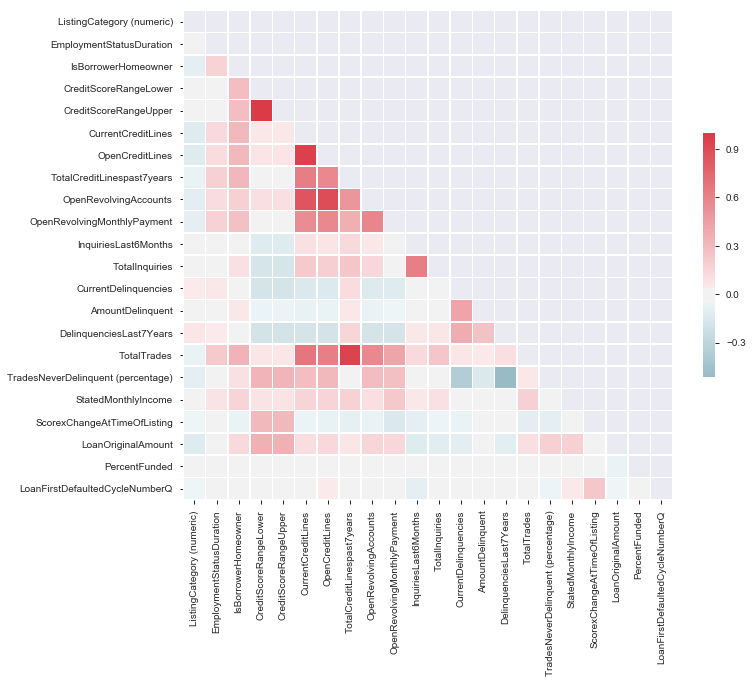

In [63]:
corr = df[num_features].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Viéndolo de forma numérica y quitando aquellos valores cuya correlación sea igual a 1 (los cuales serán aquellos que relacionenuna variable con su idéntica) observamos las mayores correlaciones existentes de nuestras variables numéricas

In [64]:
corr[corr!=1.].max().sort_values().tail(5)

OpenRevolvingAccounts         0.888447
TotalCreditLinespast7years    0.942083
TotalTrades                   0.942083
OpenCreditLines               0.957426
CurrentCreditLines            0.957426
dtype: float64

#### Get pairs of highly correlated features

In [65]:
corr_TH = 0.75
n_corr_list = []
corr_feats_list = []

Nos creamos un *for* en donde:


- Recorremos cada una de las variables numéricas
- Trabajamos con valores absolutos para eliminar valores negativos y evitar inconsistencias
- Establecemos que nos extraiga las correlaciones que sean superiores a 0.75, ya que ha sido nuestro umbral seleccionado

In [66]:
for f in num_features:
    corr_f = corr[f][[col for col in num_features if col!=f]]
    corr_f_abs = corr_f.abs()
    corr_ht_th = corr_f_abs[corr_f_abs>corr_TH]
    n_corr_list.append(corr_ht_th.shape[0])
    corr_feats_list.append(corr_ht_th)
    
corr_relations = [(feat, n, feats_corr) for n, feats_corr, feat in zip(n_corr_list, corr_feats_list, num_features) if n>0]
corr_relations

[('CreditScoreRangeLower', 1, CreditScoreRangeUpper    1.0
  Name: CreditScoreRangeLower, dtype: float64),
 ('CreditScoreRangeUpper', 1, CreditScoreRangeLower    1.0
  Name: CreditScoreRangeUpper, dtype: float64),
 ('CurrentCreditLines', 2, OpenCreditLines          0.957426
  OpenRevolvingAccounts    0.853989
  Name: CurrentCreditLines, dtype: float64),
 ('OpenCreditLines', 2, CurrentCreditLines       0.957426
  OpenRevolvingAccounts    0.888447
  Name: OpenCreditLines, dtype: float64),
 ('TotalCreditLinespast7years', 1, TotalTrades    0.942083
  Name: TotalCreditLinespast7years, dtype: float64),
 ('OpenRevolvingAccounts', 2, CurrentCreditLines    0.853989
  OpenCreditLines       0.888447
  Name: OpenRevolvingAccounts, dtype: float64),
 ('TotalTrades', 1, TotalCreditLinespast7years    0.942083
  Name: TotalTrades, dtype: float64)]

### Recommended tool: pandas-profiling

Para detallar en profundidad el análisis estadístico sobre cada una de las **FEATURES** tendremos que instalarnos *pandas-profiling* con el *PIP INSTALL* en nuestra consola

In [67]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df[features])
profile.to_file(outputfile="output.html")

Se nos genera un HTML accesorio pero si deseamos que se nos muestre en pantalla toda la información estadística sobre cada una de las variables contenidas en las **FEATURES** con el comando *DISPLAY* la podremos mostrar en nuestro notebook

In [68]:
display(profile)

Number of variables,25
Number of observations,16987
Total Missing (%),6.0%
Total size in memory,3.1 MiB
Average record size in memory,193.0 B
Numeric,18
Categorical,3
Boolean,1
Date,0
Text (Unique),0
Rejected,3


## IV / WoE


Una vez identificadas las variables más importantes, el siguiente paso que tenemos que hacer es establecer los trameados (buckets), con la misma acción para las variables categóricas y numéricas

In [69]:
#visualization functions
def capture_df(feat_col, input_slider, n_bins, df, target_col):
    """
    Handles the type of the data to generate the intermediate datadframe
    """
    if df[feat_col].dtype in [int, float, np.number]:
        return df_vol_br_num(feat_col, input_slider, n_bins, df, target_col)
    else:
        return df_vol_br_cat(feat_col, input_slider, n_bins, df, target_col)

#capture volume / BR df for numerical variables
def df_vol_br_num(feat_col, input_slider, n_bins, df, obj_col):
    """
    Generate the intermediate dataframe with number of observations and 
    number of bads per bin. Specific for numerical features.
    """
    #get the numeric input from the dual slider
    perc_sliders = [v/100. for v in input_slider]
    var_lims = df[feat_col].quantile([perc_sliders[0], perc_sliders[1]]).values
    v_min, v_max = var_lims[0], var_lims[1]
    #filter the dataset using the slider input
    df_cut = df.loc[(df[feat_col] <= v_max) & (df[feat_col] >= v_min)][[obj_col, feat_col]]
    #number of cuts = minumum of n_bins, number of unique values of the variable
    n_cuts = min(int(n_bins), df_cut[feat_col].nunique())
    cuts = [c for c in np.linspace(v_min, v_max, n_cuts + 1)]
    if cuts[-1] < v_max:
        cuts.append(v_max)
    cut_col = feat_col + '_'
    df_cut[cut_col] = pd.cut(df_cut[feat_col], cuts, include_lowest=True)
    #generate aggregated values
    N = df_cut.groupby(cut_col)[feat_col].count().values
    TR = df_cut.groupby(cut_col)[obj_col].mean().values
    cuts = df_cut.groupby(cut_col)[feat_col].count().index.astype(str).values
    #handle NA entries
    if df[feat_col].isna().sum() > 0:
        N = np.append(([df[feat_col].isna().sum()]), N)
        TR = np.append(([df.loc[df[feat_col].isna()][obj_col].mean()]), TR)
        cuts =  np.append(['NA'], cuts)
    #generate global transformation rate
    return (pd.DataFrame({'cuts': cuts,
                         'N': N,
                         'BR': TR}), df_cut[obj_col].mean())

#capture volume / BR df for categorical variables
def df_vol_br_cat(feat_col, input_slider, n_bins, df, target_col):
    """
    Generate the intermediate dataframe with number of observations and 
    number of bads per bin. Specific for categorical features.
    """
    #pick top n_bins levels by volume
    cut_levels = df.groupby(feat_col)[feat_col].count().sort_values(ascending=False)[:int(n_bins)].index.values.tolist()
    df_cut = df.loc[df[feat_col].isin(cut_levels)]
    #capture volumes
    N = df_cut.groupby(feat_col)[feat_col].count().values
    #capture transformations
    TR = df_cut.groupby(feat_col)[target_col].mean().values
    return (pd.DataFrame({'cuts': df_cut.groupby(feat_col)[feat_col].count().index.astype(str).values,
                         'N': N,
                         'BR': TR}), df_cut[target_col].mean())


def output_graph_update(feat_col, input_slider, n_bins, df, obj_col):
    """
    Generate the plotly plot showing the visualization of the intermediate 
    dataframe with volume and bad rate per bin.
    """
    #get the df with volume and bad rate
    df_tr, avg_tr = capture_df(feat_col, input_slider, n_bins, df, obj_col)
    #line represents transformation rate
    tr_line = go.Scatter(x = df_tr.cuts,
                         y = df_tr.BR,
                         yaxis = 'y2',
                         name = 'BR')
    #bar represents volume @ cut
    vol_bars = go.Bar(x = df_tr.cuts,
                      y = df_tr.N,
                      name = 'Volume')
    #avg line
    avg_line = go.Scatter(x = df_tr.cuts,
                          y = np.repeat(avg_tr, df_tr.shape[0]),
                          yaxis = 'y2',
                          name = 'AVG BR',
                          line = dict(
                              color = ('rgb(205, 0, 0)')
                                     )
                         )
    #small layout
    layout = go.Layout(
            title = 'BR for ' + feat_col,
            yaxis = dict(title = 'Volume',
                         range = [0, max(df_tr.N)]),
            yaxis2 = dict(title = 'BR',
                         overlaying='y',
                         side='right',
                         range = [0, max(df_tr.BR) + 0.05*max(df_tr.BR)])

        )
    return {'data': [vol_bars, tr_line, avg_line],
            'layout': layout}

In [70]:
np.linspace(600, 800, 6)

array([600., 640., 680., 720., 760., 800.])

Establecemos 5 buckets para hacer agrupamientos para cada una de las variables, con los siguientes objetivos:
- Evitar problemas con outliers o comportamientos anómalos
- Hace más sencillo entender las relaciones, por lo que ayuda a entender mejor el portfolio
- Problemas de no linealidad se pueden modelizar con este enfoque de una forma más sencilla

In [71]:
df_buckets, avg_ratio = df_vol_br_num('CreditScoreRangeLower', [0, 95], 5, df,'bad')
df_buckets

,cuts,N,BR
0,"(599.999, 640.0]",2950,0.083729
1,"(640.0, 680.0]",4782,0.070682
2,"(680.0, 720.0]",4302,0.063459
3,"(720.0, 760.0]",2900,0.054138
4,"(760.0, 800.0]",1523,0.024294


In [72]:
df_buckets['N_bads'] = df_buckets.N * df_buckets.BR
df_buckets

,cuts,N,BR,N_bads
0,"(599.999, 640.0]",2950,0.083729,247.0
1,"(640.0, 680.0]",4782,0.070682,338.0
2,"(680.0, 720.0]",4302,0.063459,273.0
3,"(720.0, 760.0]",2900,0.054138,157.0
4,"(760.0, 800.0]",1523,0.024294,37.0


In [73]:
df_buckets['N_goods'] = df_buckets.N - df_buckets.N_bads

In [74]:
df_buckets['Dist_goods'] = df_buckets['N_goods'] / df_buckets['N_goods'].sum()
df_buckets['Dist_bads'] = df_buckets['N_bads'] / df_buckets['N_bads'].sum()

In [75]:
df_buckets['WoE'] = np.log(df_buckets['Dist_goods'] / df_buckets['Dist_bads']) * 100
# Mirar tasa de malos y media y comparar con WoE
# WoE similar a 0, se comporta con respecto a la media, ni malo ni bueno.

In [76]:
df_buckets['IV'] = (df_buckets.WoE/100) * (df_buckets.Dist_goods - df_buckets.Dist_bads)

In [77]:
df_buckets
# El IV tiene que ser a nivel variable global
# El global es el sumatorio
df_buckets.IV.sum()

0.08775837881950714

In [78]:
def NA_treatment(x):
    if(x == 0):
        return(np.NAN)
    else:
        return(x)
    
def get_IV(df, feature, BR):
    df[BR] = df[BR].apply(NA_treatment)
    df['N_bads'] = df['N'] * df[BR]
    df['N_goods'] = df['N'] - df['N_bads']
    df['Dist_goods'] = df['N_goods'] / df['N_goods'].sum()
    df['Dist_bads'] = df['N_bads'] / df['N_bads'].sum()
    df['WoE'] = np.log(df['Dist_goods'] / df['Dist_bads']) * 100
    df['IV'] = (df['WoE']/100) * (df['Dist_goods'] - df['Dist_bads'])
        
    IV_total = df['IV'].sum()
    return(IV_total)

#### Estimate the IV for all features

In [79]:
ivs = []
for c in features:
    df_tr, avg_br = capture_df(c, [0., 95.], 5, df, 'bad')
    ivs.append(get_IV(df_tr, c, 'BR').sum())
df_iv = pd.DataFrame({'feature': features,
                      'IV': ivs}).sort_values(by='IV', ascending=False)
df_iv

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning:

divide by zero encountered in log



,feature,IV
24,LoanFirstDefaultedCycleNumberQ,inf
19,IncomeRange,0.145180
20,StatedMonthlyIncome,0.119612
22,LoanOriginalAmount,0.115468
21,ScorexChangeAtTimeOfListing,0.108946
5,CreditScoreRangeLower,0.087758
6,CreditScoreRangeUpper,0.087758
1,Occupation,0.078836
7,CurrentCreditLines,0.074093
2,EmploymentStatus,0.073630


### visualize some features versus the Bad rate

In [80]:
#dynamic plotting libraries
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [81]:
df_iv.head()

,feature,IV
24,LoanFirstDefaultedCycleNumberQ,inf
19,IncomeRange,0.145180
20,StatedMonthlyIncome,0.119612
22,LoanOriginalAmount,0.115468
21,ScorexChangeAtTimeOfListing,0.108946


La mejor variable que explica nuestro modelo es la **FirstRecordedCreditLine** 

In [82]:

df_iv.loc[(df_iv.IV > 0.11) | (df_iv.IV < 0.020)][:8]

,feature,IV
24,LoanFirstDefaultedCycleNumberQ,inf
19,IncomeRange,0.145180
20,StatedMonthlyIncome,0.119612
22,LoanOriginalAmount,0.115468
14,CurrentDelinquencies,0.018481
11,OpenRevolvingMonthlyPayment,0.013353
13,TotalInquiries,0.009793
18,TradesNeverDelinquent (percentage),0.008130


In [83]:
#plot features
for c in df_iv.feature.values.tolist():
    py.iplot(output_graph_update(c, [0., 97.5], 6, df, 'bad'))

### Stability check - PSI

EL **PSI** es el test de estabilidad de la población. El umbral de valores extraídos del PSI se interpreta de la siguiente manera:


- PSI <= 0,10 sin cambios significativos
-  0,10 < PSI <= 0,25 pequeños cambios,  investigar
- PSI > 0,25 cambio significativo

In [85]:
def PSI_numeric(series, in_out_time_series):
    """Returns the population stability index for numerical variables
    
    Args:
        series: Pandas Series, the variable to describe
        in_out_time_series: Pandas Series It contains the in time / out of time series
        
    Returns:
        Estimated PSI
    """
    pd_aux = pd.DataFrame(dict(data = series, in_out = in_out_time_series)).reset_index()
    #capture in time and out of time series
    in_series = pd_aux.loc[pd_aux.in_out == True]['data']
    out_series = pd_aux.loc[pd_aux.in_out == False]['data']

    #base data deciles
    qqs = in_series.quantile(q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

    #cut the data, based in the base series deciles
    in_series_cut = pd.cut(in_series, sorted(list(set(qqs.values))), include_lowest=True)
    out_series_cut = pd.cut(out_series, sorted(list(set(qqs.values))), include_lowest=True)
    #count volume per bin
    in_grp = in_series_cut.value_counts(dropna=False)
    out_grp = out_series_cut.value_counts(dropna= not (np.nan in in_grp.index.values.tolist()))
    #small fix, so some inf values are fixed
    out_grp[out_grp==0] = 0.01

    #N observations in each series
    N_in = len(in_series_cut)
    N_out = len(out_series_cut)

    #convert to share in each bin
    in_grp = in_grp / N_in
    out_grp = out_grp / N_out

    return sum((in_grp-out_grp)*np.log(in_grp/out_grp))

def PSI_categorical(series, in_out_time_series):
    """Returns the population stability index for categorical variables
    
    Args:
        series: Pandas Series, the variable to describe
        in_out_time_series: Pandas Series It contains the in time / out of time series
        
    Returns:
        Estimated PSI
    """
    pd_aux = pd.DataFrame(dict(data = series, in_out = in_out_time_series)).reset_index()
    #capture in time and out of time series
    in_series = pd_aux.loc[pd_aux.in_out == True]['data']
    out_series = pd_aux.loc[pd_aux.in_out == False]['data']
    
    #count volume per level
    in_grp = in_series.value_counts(dropna=False)
    out_grp = out_series.value_counts(dropna= not (np.nan in in_grp.index.values.tolist()))
    
    #N observations in each series
    N_in = len(in_series)
    N_out = len(out_series)
    
    #convert to share in each bin
    in_grp = in_grp / N_in
    out_grp = out_grp / N_out
    
    #put all together in a df
    df_grp = in_grp.to_frame().join(out_grp.to_frame(), lsuffix = '_in', rsuffix = '_out')
    df_grp = df_grp.fillna(0.000001)

    return sum((df_grp.data_in - df_grp.data_out) * np.log(df_grp.data_in / df_grp.data_out))

In [86]:
psi = []
#capture in time - out of time series
it_oot_series = pd.Series(np.hstack((np.ones(len(df)), np.zeros(len(df_oot)))))
#for all features
features_ = ['DebtToIncomeRatio']

for c in features:
    col_series = pd.concat([df[c], df_oot[c]], ignore_index=True)
    if df[c].dtypes == object:
        psi.append(PSI_categorical(col_series, it_oot_series))
    else:
        psi.append(PSI_numeric(col_series, it_oot_series))

df_psi = pd.DataFrame({'feature': features,
                       'PSI': psi})
df_psi = df_psi.sort_values(by='PSI')
df_psi

E:\Anaconda3\lib\site-packages\pandas\core\generic.py:7441: RuntimeWarning:

unorderable types: Interval() > float(), sort order is undefined for incomparable objects

E:\Anaconda3\lib\site-packages\pandas\core\generic.py:7441: RuntimeWarning:

unorderable types: Interval() < float(), sort order is undefined for incomparable objects

E:\Anaconda3\lib\site-packages\pandas\core\generic.py:7441: RuntimeWarning:

unorderable types: Interval() < float(), sort order is undefined for incomparable objects



,feature,PSI
4,IsBorrowerHomeowner,0.000000e+00
23,PercentFunded,2.141008e-08
15,AmountDelinquent,7.428038e-05
14,CurrentDelinquencies,3.430635e-04
16,DelinquenciesLast7Years,1.055222e-03
13,TotalInquiries,3.452111e-03
12,InquiriesLast6Months,4.000090e-03
19,IncomeRange,9.661644e-03
18,TradesNeverDelinquent (percentage),9.802307e-03
20,StatedMonthlyIncome,1.143998e-02


Los últimos cuatro se aprecian cambios. En cambio, el resto de las variables no se aprecian cambios significativos

#### Examples of very stable features

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



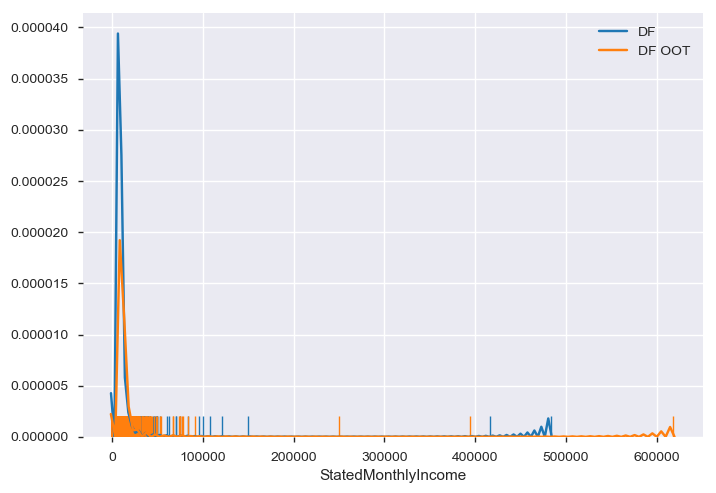

{'Mean': 5516.876572284392,
 'Median': 4583.333333,
 'Min': 0.0,
 'Max': 483333.333333,
 'p25': 3100.0,
 'p75': 6666.666667,
 'Std': 6563.539084030216,
 'NA %': 0.0,
 'Non Zero %': 0.9854594690057102}

In [87]:
desc_num(df, df_oot, 'StatedMonthlyIncome')

Podemos observar a través del gráfico de arriba que la *Distribución tanto del INTIME como el OOT* son estables ya que la forma de las distribuciones son similares

In [88]:
desc_cat(df, df_oot, 'IncomeRange')

{'Unique Entrys': array(['$25,000-49,999', '$75,000-99,999', '$50,000-74,999', '$100,000+',
        '$1-24,999', 'Not employed', '$0'], dtype=object),
 '% Unique Entries': 0.04120798257491023,
 'Top frequent entry': 0    $25,000-49,999
 dtype: object,
 'topEntryFreq': 5420,
 'NA rate %': 0.0}

#### Examples of not so stable features

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



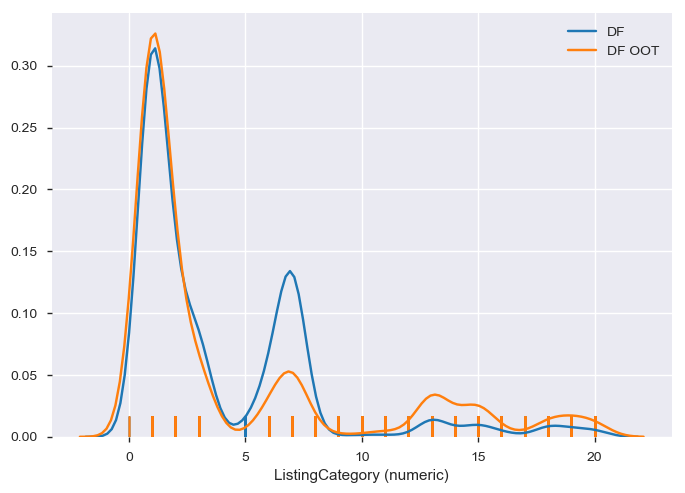

{'Mean': 3.840289633248955,
 'Median': 2.0,
 'Min': 0,
 'Max': 20,
 'p25': 1.0,
 'p75': 7.0,
 'Std': 4.103710458255704,
 'NA %': 0.0,
 'Non Zero %': 0.9998233943603932}

In [89]:
desc_num(df, df_oot, 'ListingCategory (numeric)')

In [90]:
#save the data, as it will come handy in future work
# Se escribe serializado
import pickle
#build a dictionary and serialize it
dict_dump = {'features': features,
             'corr_data': corr_relations,
             'iv_df': df_iv,
             'psi_df': df_psi}
pickle.dump(dict_dump, open('output_D2.pkl', 'wb'))

La variable creada *dict_dump* extrae para cada variable tanto el **IV** como el **PSI**